In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
data=pd.read_csv("corazon.csv")#Leemos el fichero csv
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.columns#Mostramos el nombre de las columnas

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Preprocesamiento de los datos

In [4]:
data #Podemos ver que todos los datos son numericos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.info() #Podemos ver que no hay missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Quitamos rows con distintos resultados para que el test tengo datos balanceados.

In [6]:
#Quitamos 3 rows para utilizarlos en el ultimo apartado dado que estos tienen como target 0
test=data.tail(3)
data.drop(data.tail(3).index,inplace=True)

In [7]:
#Quitamos 2 rows para utilizarlos en el ultimo apartado dado que estos tienen como target 1
test1=data.head(2)
data.drop(data.head(2).index,inplace=True)

In [8]:
test = pd.concat([test,test1])#Unimos los dos dataframes del test

In [9]:
data#Dataframe sin rows del test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


# Criterios de division

He escogido los arboles de decision mediante reglas como modelo dado que en el enunciado se nos pide en uno de los apartados las reglas que se han utilizado, por ello entiendo que es el clasificador que hay que utilizar.

Para evaluar el error se variara el valor de maxdepth

Utilizaremos como criterio de division el sexo y el fasting blood sugar para facilitar el desarrollo dado que estas variables solo tienen dos valores posibles, 1 o 0.

Dataset en el que ambas variables son 0 

In [10]:
dataset1=data[(data['sex']==0) & (data['fbs']==0)]
dataset1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


Dataset en el que ambas variables son 1

In [11]:
dataset2=data[(data['sex']==1) & (data['fbs']==1)]
dataset2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


Dataset 1

In [12]:
#Vemos el numero maximo de profundidad del arbol para obtener el menor error
#Creacion de las variables donde se guardan tanto el error como el numero de max depth
def pintarmaxdepth(dataset,color):
    #Creamos los datos con de entrenamiento y el test
    x=dataset.drop(["target"],axis=1)
    y=dataset["target"]
    #80% para el training 20%para el test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    numero=list(range(1, 101))
    error = []
    error = list()
    for i in range (1,101):
        #Definimos el clasificador
        arbol=DecisionTreeClassifier(max_depth=i,random_state=5)
        #Entrenamos con el clasificador y los datos de entrenamiento
        arbol.fit(x_train,y_train)
        #Calculamos el error
        precision=arbol.score(x_test,y_test)
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        #Grafica que muestra la comparacion del error con la profundidad
    zmin = np.min(error)
    posicion=np.where(min(error) == error)
    posicion=np.asarray(posicion)
    print('El numero de max depth es: '+str(posicion+1))
    print("Minimo error es: "+str(zmin))
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Error Max depth ')
    plt.xticks(numero)
    plt.xlabel('Max depth')
    plt.ylabel('Error')
    plt.show()

El numero de max depth es: [[  1   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
   21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
   39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
   57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
   75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
   93  94  95  96  97  98  99 100]]
Minimo error es: 0.05882352941176472


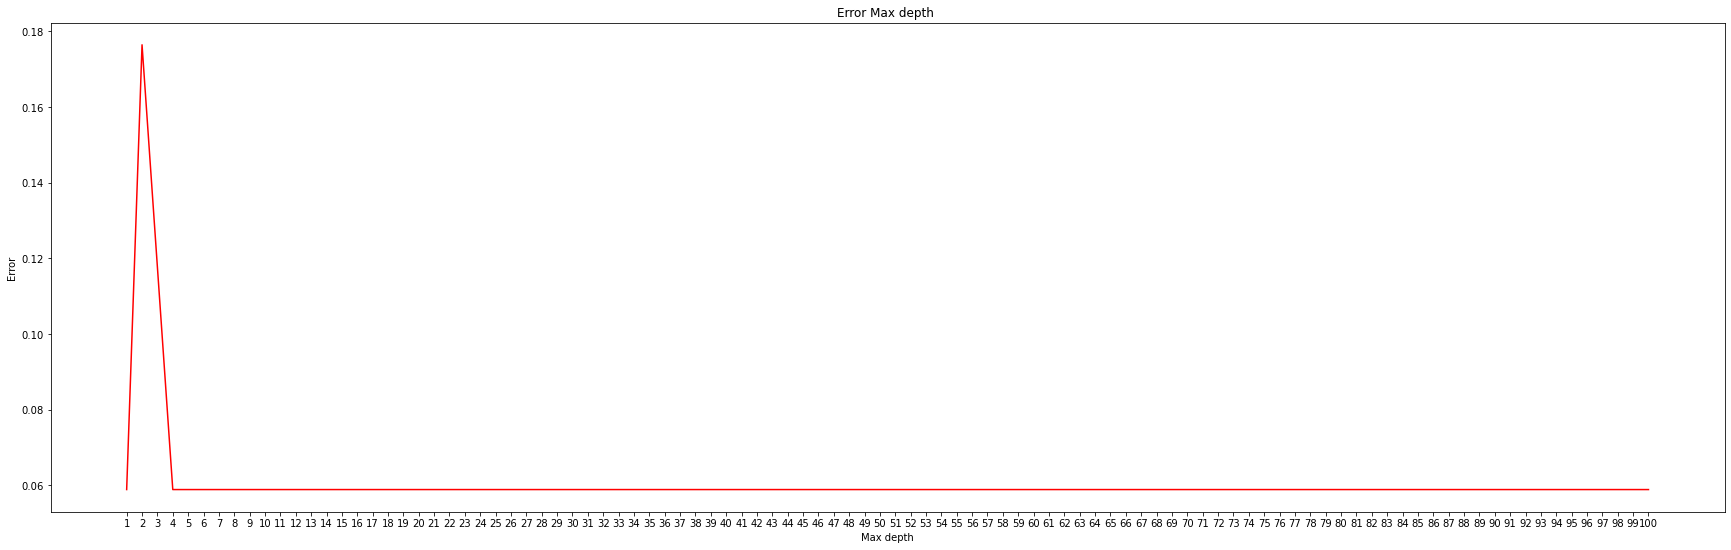

In [13]:
pintarmaxdepth(dataset1,'red')

Dataset 2

El numero de max depth es: [[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
   37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
   55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
   73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
   91  92  93  94  95  96  97  98  99 100]]
Minimo error es: 0.2857142857142857


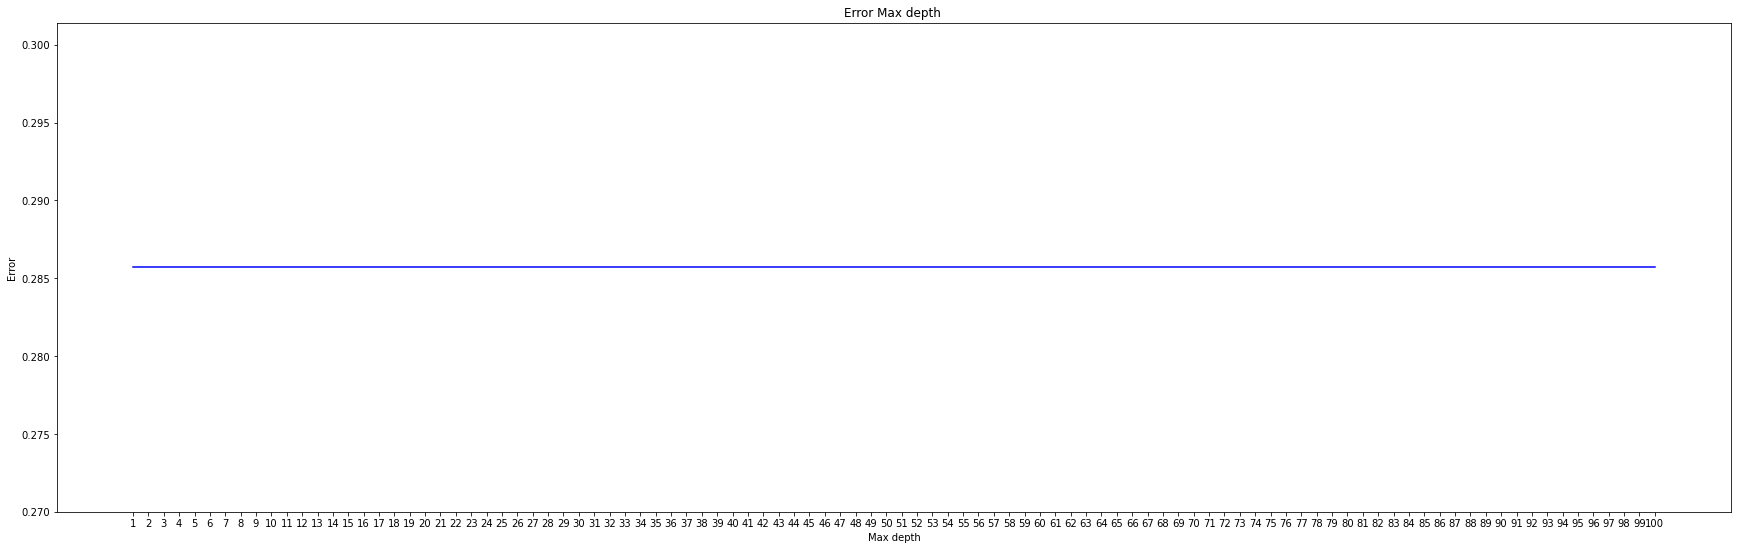

In [14]:
pintarmaxdepth(dataset2,'blue')

Podemos ver que el minimo error entre ambos datasets se encuentra en el primero dado que este
tiene 0.05882352941176472 de error minimo mientras que el dataset 2 tiene 0.2857142857142857 de error minimo.
Por ello escogeremos el primer dataset.

# Dibuja el modelo que tiene mas precision

In [15]:
#Creamos los datos con de entrenamiento y el test
x=dataset1.drop(["target"],axis=1)
y=dataset1["target"]
#80% para el training 20%para el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2


La max depth que escogemos es un numero al azar entre las opciones mostradas con el menor error en el ejercicio en el que se escoge el mejor dataset.
En este caso se escoge el valor de 7 como maxdepth.

In [16]:
arbol=DecisionTreeClassifier(max_depth=7,random_state=5)
    #Entrenamos con el clasificador y los datos de entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=5)

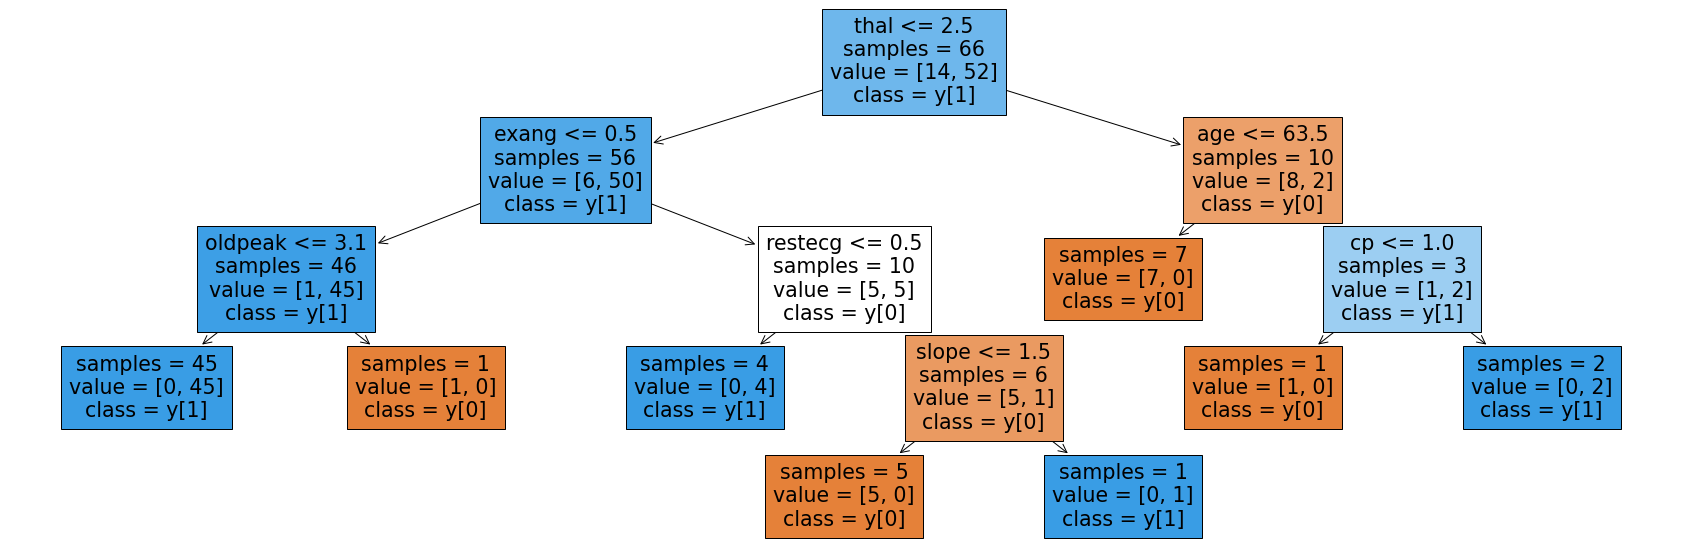

In [17]:
#cogemos el nombre de las variables de 
columnas=list(x.columns)
#Hacemos que se muestre mas grande
plt.subplots(figsize=(30, 10))
plot = sklearn.tree.plot_tree(decision_tree = arbol #arbol utilizado
                              ,feature_names = columnas#Utilizar las columnas del arbol
                              ,class_names=True,#Utilizar las columnas 
                              filled= True,# se utiliza para pintar los nodos de forma distinta los nodos 
                              #que generalizan mas de los que generalizan menos
                              impurity= False)

#no interesa que muestra la impureza de cada nodo

# 3.Selecciona tres reglas que sean las que generalicen lo menos posible y otras tres que especialicen los menos posible. Interprétalas

In [18]:
#show_weights para representar el numero de samples que pertenecen a cada clase segun la condicion 
text_representation = tree.export_text(arbol, feature_names=columnas,show_weights=True)
print(text_representation)

|--- thal <= 2.50
|   |--- exang <= 0.50
|   |   |--- oldpeak <= 3.10
|   |   |   |--- weights: [0.00, 45.00] class: 1
|   |   |--- oldpeak >  3.10
|   |   |   |--- weights: [1.00, 0.00] class: 0
|   |--- exang >  0.50
|   |   |--- restecg <= 0.50
|   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |--- restecg >  0.50
|   |   |   |--- slope <= 1.50
|   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |--- slope >  1.50
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|--- thal >  2.50
|   |--- age <= 63.50
|   |   |--- weights: [7.00, 0.00] class: 0
|   |--- age >  63.50
|   |   |--- cp <= 1.00
|   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |--- cp >  1.00
|   |   |   |--- weights: [0.00, 2.00] class: 1



Suponiendo que las reglas que tengan mas samples son las que generalizan mejor y , por tanto, aquellas que tengan pocos samples son aquellas que generalizan menos y que los decimales los redondeamos hacia arriba obtenemos: 

GENERALIZAN LO MENOS POSIBLE

## IF thal <= 2.50 AND exang <= 0.50 AND oldpeak >  3.10, samples 1
En el caso de que el numero de mayor vessels sea menor o igual que 3 y el numero de exercise induced angina sea inferior o igual a 1 y que oldpeak sea superior a 3, pertencera a la clase 0, es decir el target sera 1.
## IF exang >  0.50 AND restecg >  0.50 AND slope >  1.50, samples 1
En el caso de que exang sea mayor que 1 y que el resting electrocardiographic results sea mayor que 1 y que slope sea mayor que 1 pertenecera a la clase 1, es decir el target sera 0.
## IF thal >  2.50 AND age >  63.50 AND cp <= 1.00, samples 1
En el caso de que el numero de mayor vessels >  2.50 y de que la edad sea  >  63.50 y que el chest pain type sea <= 1.00 pertenecera a la clase 0, es decir el target sera 1.

GENERALIZAN LO MAS POSIBLE

## IF thal <= 2.50 AND exang <= 0.50 AND oldpeak <= 3.10, samples 45
En el caso de que el numero de mayor vessels sea <= 2.50 y de que el exercise induced angina sea <= 0.50 y de que oldpeak sea <= 3.10 pertenecera a la clase 1, es decir el target sera 0.
## IF thal >  2.50 AND age <= 63.50, samples 7
En el caso de que el numero de mayor vessels sea >  2.50 y la edad sea <= 63.50 pertenecera a la clase 0, es decir el target sera 1.
## IF exang >  0.50 AND restecg >  0.50 AND slope <= 1.50, samples 5
En el caso de que el exercise induced angina sea > 0.50 y de que resting electrocardiographic results sea > 0.50 y de que slope sea <= 1.50 pertenecera a la clase 0, es decir el target sera 1.

# 4.Usa tu clasificador para clasificar a 5 pacientes que no se hayan usado en los pasos anteriores. Dichos pacientes deberán presentar diferentes resultados en sus pruebas médicas.

In [19]:
#Mostramos que tienen diferentes resultados en las pruebas medicas
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [20]:
#Preparamos los datos
x_test=test.drop(["target"],axis=1)
y_test=test["target"]
print(arbol.score(x_test,y_test))

In [21]:
#Pasamos los datos nuevos por el clasificador y mostramos la matriz de confusion
confusion_matrix(arbol.predict(x_test), y_test)

array([[2, 1],
       [1, 1]])

Clasifica correctamente 2 de target 0 y uno lo clasifica incorrectamente, mientras que clasifica correctamete 1 de target 1 pero clasifica incorrectamente 1.

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html